Un árbol de decisión es un diagrama que nos permite visualizar los posibles resultados y consecuencias tras una decisión, para ello utiliza una estructura basada en jerarquias que som representadas por nodos(preguntas o condiciones) y ramas(posibles respuestas o resultados).

In [ ]:
import numpy as np #Numpy para manejo de arreglos
import pandas as pd#Pandas para la manipulación y análisis de datos tabulares
import matplotlib.pyplot as plt#matplotlib para crear visualizaciones , gráficos , lineas
from sklearn.tree import DecisionTreeClassifier, plot_tree #Sklearn libreria para la ciencia de datos y el aprendizaje automático
from sklearn.preprocessing import LabelEncoder
#plot_tree permite visualizar el arbol de decision

#Diccionario data para el manejo de las variables y decisiones
data = {
    "Temperatura":[20,22,25,28,30,30,27],
    "Humedad":[80,70,65,60,55,85,90],
    "CompraHelado":["No","No","No","Si","Si","No","No"]
}

#Representamos los datos en una tabla
df = pd.DataFrame(data)
print(df)

   Temperatura  Humedad CompraHelado
0           20       80           No
1           22       70           No
2           25       65           No
3           28       60           Si
4           30       55           Si
5           30       85           No
6           27       90           No


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


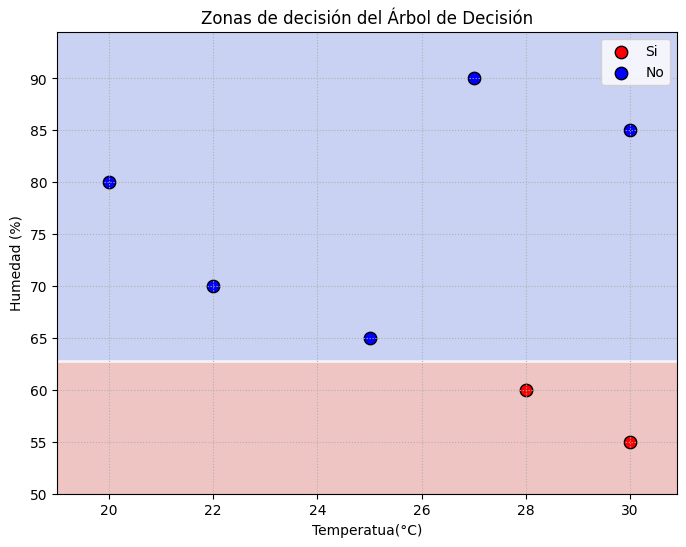

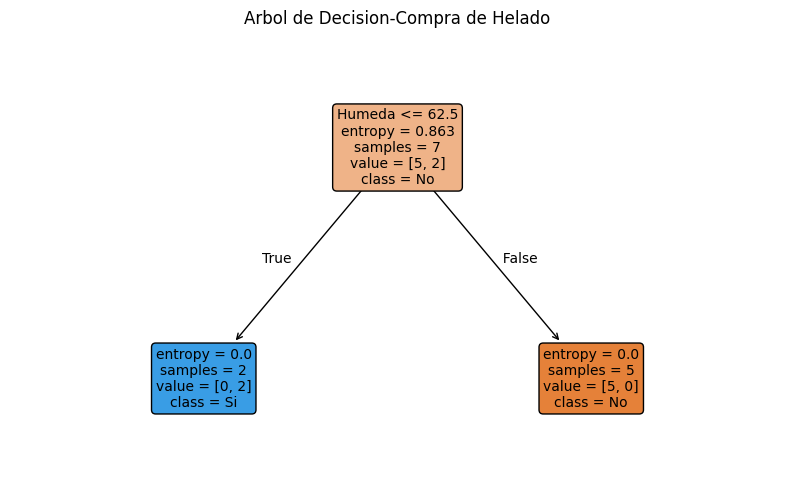

In [ ]:
#Preparamos los datos
X = df[["Temperatura","Humedad"]] #Características o Variables independientes
Y = df["CompraHelado"] #Variable dependiente o objetiva

#Creación del modelo árbol de decisión
arbol = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)#max_depth establece el nivel de profundidad
arbol.fit(X,Y)#fit almacena los datos para su posterior transformacion
#Visualización de los datos
#Creacion del campo para graficar la zona de decision
x_min, x_max = X["Temperatura"].min() - 1, X["Temperatura"].max()+1
y_min, y_max = X["Humedad"].min() - 5 , X["Humedad"].max() + 5

#meshgrid permite trabajar con cuadrículas
#arange permite la creacción de arreglos
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
                  np.arange(y_min,y_max,0.5))
#Ravel permite transformar desde un plano multidimensional a uno unidimensional(Aplanación)
Z = arbol.predict(np.c_[xx.ravel(),yy.ravel()])
#Reshape permite cambiar las dimensiones sin alterar los datos
le = LabelEncoder()
le.fit(Y)
Z = le.transform(Z) #Convertirá las clases("Si" /"No") a 0 y 1
Z = Z.reshape(xx.shape)

#Dibujamos las regiones
plt.figure(figsize=(8,6))
#Contour sirve para dibujar los contornos
plt.contourf(xx,yy,Z,alpha=0.3,cmap='coolwarm')

#Dibujamos los puntos reales
for label, color in [("Si", "red"),("No","blue")]:
  subconjunto = df[df["CompraHelado"]== label]
  #Scatter permite ver como se relaccionan ambas variables(Temperatura-Humedad)
  plt.scatter(subconjunto["Temperatura"],subconjunto["Humedad"], c=color,label=label,s=80,edgecolors='k')

plt.title("Zonas de decisión del Árbol de Decisión")
plt.xlabel("Temperatua(°C)")
plt.ylabel("Humedad (%)")
plt.legend()
plt.grid(True,linestyle=':')
plt.show()


#Mostraremos el arbol de decisión
plt.figure(figsize=(10,6))
plot_tree(arbol,
          feature_names=["Temperatura","Humeda"],
          class_names=["No","Si"],
          filled=True, rounded=True, fontsize=10)
plt.title("Arbol de Decision-Compra de Helado")
print("")
plt.show()